<a href="https://colab.research.google.com/github/eriksilva01/tempo_tratamento_de_dados/blob/main/tempo_udemyII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importação das bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts


# **Leitura do arquivo**

In [2]:
from google.colab import files
upload = files.upload()

Saving tempo.csv to tempo.csv


In [3]:
df = pd.read_csv('tempo.csv', sep=';')
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [4]:
# Onde temos valores Nulos - NaN
df.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,1
Vento,1
Jogar,0


# **Tratando os valores da coluna Umidade**

In [5]:
# Forçando os Strings em Numericos na coluna Umidade
df['Umidade'] = pd.to_numeric(df['Umidade'], errors='coerce')

In [6]:
# Calculando a moda
moda = df['Umidade'].mode()[0]
moda

np.float64(70.0)

In [7]:
# Calculando a mediana
mediana = sts.median(df['Umidade'])
mediana

85.5

In [8]:
#Substituindo o valores outliers por NaN em duas colunas
df = df.replace([200], np.nan)
df



,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,NaN,NaN,sim


In [9]:
# Resumo dos valores
df.describe()

,Temperatura,Umidade
count,14.000000,12.000000
mean,155.571429,80.583333
std,306.433759,10.237705
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,82.500000
75%,80.750000,90.000000
max,1220.000000,95.000000


In [10]:
# Substituindo os valores nulos
df['Umidade'] = df['Umidade'].fillna(moda)


In [11]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,70.0,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,70.0,NaN,sim


# **Tratando os valores da coluna Temperatura**

In [12]:
# Forçando para numericos
df['Temperatura'] = pd.to_numeric(df['Temperatura'], errors='coerce')
df['Temperatura'].describe()

,Temperatura
count,14.000000
mean,155.571429
std,306.433759
min,64.000000
25%,69.250000
50%,73.500000
75%,80.750000
max,1220.000000


In [13]:
# Transformando a coluna de Farenheit para Celsius
df['Temperatura'] = df['Temperatura'] - 32 * 5/9
df['Temperatura']

,Temperatura
0,67.222222
1,62.222222
2,65.222222
3,52.222222
4,50.222222
5,47.222222
6,46.222222
7,1202.222222
8,51.222222
9,57.222222


In [14]:
# Transformando em 1 casa depois da vírgula
outlier_temperatura = df['Temperatura'] > 100
df.loc[ outlier_temperatura, 'Temperatura'] = np.nan


In [15]:
#Calculando a moda
moda_temperatura = df['Temperatura'].mode()[0]
moda_temperatura

np.float64(57.22222222222222)

In [16]:
# Substituindo os valores NaN pela moda
df['Temperatura'] = df['Temperatura'].fillna(moda_temperatura)

In [17]:
# Arredondando os valores para 1 casa decimal
df['Temperatura'] = df['Temperatura'].round(1)

In [18]:
df['Temperatura'].describe().round(1)

,Temperatura
count,14.0
mean,56.0
std,6.6
min,46.2
25%,51.4
50%,55.7
75%,61.0
max,67.2


#**Tratando os valores da coluna Vento**

In [19]:
# Calculando a moda da coluna
moda_vento = df['Vento'].mode()[0]
moda_vento

'FALSO'

In [20]:
# Substituindo os valores NaN
df['Vento'] = df['Vento'].fillna(moda_vento)

In [21]:
# Verificando se há algum valor NaN
df.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,0
Vento,0
Jogar,0


In [22]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,67.2,85.0,FALSO,nao
1,sol,62.2,90.0,VERDADEIRO,nao
2,nublado,65.2,86.0,FALSO,sim
3,chuva,52.2,70.0,FALSO,sim
4,chuva,50.2,80.0,FALSO,sim
5,chuva,47.2,70.0,VERDADEIRO,nao
6,menos,46.2,65.0,VERDADEIRO,sim
7,sol,57.2,95.0,FALSO,nao
8,sol,51.2,70.0,FALSO,sim
9,chuva,57.2,70.0,FALSO,sim


In [25]:
# Verificando quais as condições na coluna e quantos em cada condição
df.groupby(df['Aparencia']).size()

,0
Aparencia,
chuva,5
menos,1
nublado,3
sol,5


In [26]:
# Condições favoráveis para Jogar
condicao_jogavel = df[df['Jogar'] == 'sim']
print(condicao_jogavel)

   Aparencia  Temperatura  Umidade       Vento Jogar
2    nublado         65.2     86.0       FALSO   sim
3      chuva         52.2     70.0       FALSO   sim
4      chuva         50.2     80.0       FALSO   sim
6      menos         46.2     65.0  VERDADEIRO   sim
8        sol         51.2     70.0       FALSO   sim
9      chuva         57.2     70.0       FALSO   sim
10       sol         57.2     70.0  VERDADEIRO   sim
11   nublado         54.2     90.0  VERDADEIRO   sim
12   nublado         63.2     75.0       FALSO   sim


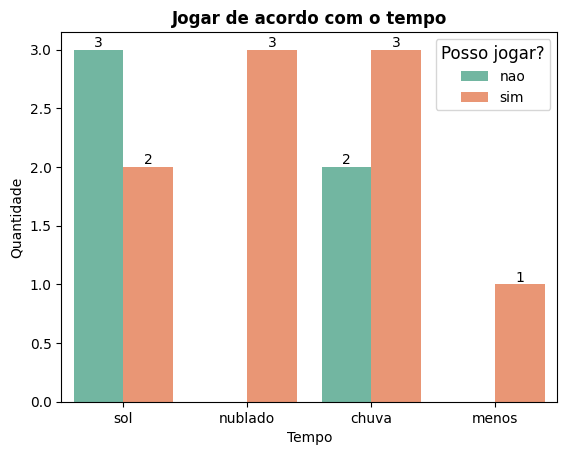

In [65]:
ax = sns.countplot(data=df, x='Aparencia', hue='Jogar', palette='Set2',)
plt.title('Jogar de acordo com o tempo', fontweight='bold')

plt.legend(title="Posso jogar?", fontsize=10, title_fontsize=12)
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
for bar in ax.containers:
    ax.bar_label(bar, label_type="edge")

plt.show()

Jogar
sim    9
nao    5
Name: count, dtype: int64


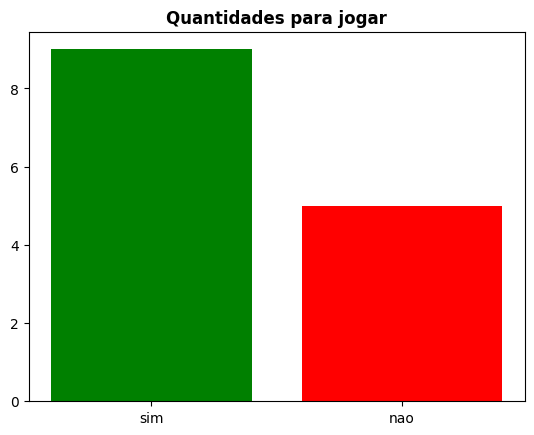

In [46]:
counts_favoravel = df['Jogar'].value_counts()
print(counts_favoravel)

plt.bar(counts_favoravel.index, counts_favoravel.values, color=['green','red'])

plt.title('Quantidades para jogar', fontweight='bold')


plt.show()